In [72]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [10]:
# # fetch dataset 
# online_retail = fetch_ucirepo(id=352)

# online_retail.keys()

# retail_df = online_retail['data']['original']

# retail_df.head()

# retail_df.to_csv("data/online_retail_uci.csv", index=False)

In [33]:
online = pd.read_csv("data/online_retail_uci.csv")

## Time Cohorts

1. Cohort analysis
00:00 - 00:19
Now we will learn about the most popular cohort analysis type - time cohorts. We will segment customers into acquisition cohorts based on the month they made their first purchase. We will then assign the cohort index to each purchase of the customer. It will represent the number of months since the first transaction.

2. Cohort analysis heatmap
00:19 - 00:46
Time based cohorts group customers by the time they completed their first activity. In this lesson, we will group customers into cohorts based on the month of their first purchase. Then we will mark each transaction based on its relative time period since the first purchase. In this example, we will calculate the number of months since the acquisition. In the next step we will calculate metrics like retention or average spend value, and build this heatmap.

3. Cohort analysis heatmap
00:46 - 01:09
For example, this number means that 24% of the cohort which signed up in August 2011, were active 4 months later. Column one here is the month of first purchase, therefore the retention rate is 100%. This is by definition, as customers had to be active on this month to be assigned to this cohort.

8. Assign time offset value
02:33 - 03:22
Now, we will calculate the number of months between any transaction and the first transaction for each customer. We will use the InvoiceMonth and CohortMonth values to do this. We will start by creating two object with year and month integer values from each of the InvoiceMonth and CohortMonth variables. Then we will calculate the differences in years and months between them. Finally, we will convert the total difference to months by multiplying the year difference by 12 and adding them together. You can see, there's a "+1" in the end. We do this so the first month is marked as 1 instead of 0 for easier interpretation. You can see that the new column is added. Now, let's pull some metrics!

9. Count monthly active customers from each cohort
03:22 - 03:52
Now we will calculate the number of monthly active customers in each cohort. First, we will create a groupby object with CohortMonth and CohortIndex. Then, we will count number of customers in each group by applying pandas nunique() function. Then, we reset the index and create a pandas pivot with CohortMonth in the rows, CohortIndex in the columns, and CustomerID counts as values. Let's take a look at our table.

### Assign daily acquisition cohort


In [34]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

In [35]:
online = online.sort_values(['CustomerID', 'InvoiceDate']).reset_index(drop=True)

In [36]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# View the top 5 rows
print(online.head())

  InvoiceNo StockCode                        Description  Quantity  \
0    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
1   C541433     23166     MEDIUM CERAMIC TOP STORAGE JAR    -74215   
2    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
3    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
4    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-01-18 10:01:00       1.04     12346.0  United Kingdom 2011-01-18   
1 2011-01-18 10:17:00       1.04     12346.0  United Kingdom 2011-01-18   
2 2010-12-07 14:57:00       2.10     12347.0         Iceland 2010-12-07   
3 2010-12-07 14:57:00       4.25     12347.0         Iceland 2010-12-07   
4 2010-12-07 14:57:00       3.25     12347.0         Iceland 2010-12-07   

   CohortDay  
0 2011-01-18  
1 2011-01-18  
2 2010-12-07  
3 2010-12-07  
4 2010-12-07  


In [39]:
online.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,2010-12-07
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,2010-12-07
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,2010-12-07
...,...,...,...,...,...,...,...,...,...,...
95,556201,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-06-09 13:01:00,4.25,12347.0,Iceland,2011-06-09,2010-12-07
96,556201,85178,VICTORIAN SEWING KIT,12,2011-06-09 13:01:00,1.25,12347.0,Iceland,2011-06-09,2010-12-07
97,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.30,12347.0,Iceland,2011-06-09,2010-12-07
98,556201,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,4,2011-06-09 13:01:00,3.29,12347.0,Iceland,2011-06-09,2010-12-07


#### Note:  CohortDay is the day of the first transaction of the customer

In [40]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

#### Calculate Time Offset in days - Part 1

In [41]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

#### Calculate time offset in days - part 2

In [44]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
print(online.head())

  InvoiceNo StockCode                        Description  Quantity  \
0    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
1   C541433     23166     MEDIUM CERAMIC TOP STORAGE JAR    -74215   
2    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
3    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
4    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-01-18 10:01:00       1.04     12346.0  United Kingdom 2011-01-18   
1 2011-01-18 10:17:00       1.04     12346.0  United Kingdom 2011-01-18   
2 2010-12-07 14:57:00       2.10     12347.0         Iceland 2010-12-07   
3 2010-12-07 14:57:00       4.25     12347.0         Iceland 2010-12-07   
4 2010-12-07 14:57:00       3.25     12347.0         Iceland 2010-12-07   

   CohortDay  CohortIndex  
0 2011-01-18          1.0  
1 2011-01-18          1.0  
2 2010-12-07          1.0  
3 2010-12-07    

In [46]:
online.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18,1.0
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18,1.0
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,2010-12-07,1.0
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,2010-12-07,1.0
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,2010-12-07,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,556201,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-06-09 13:01:00,4.25,12347.0,Iceland,2011-06-09,2010-12-07,188.0
96,556201,85178,VICTORIAN SEWING KIT,12,2011-06-09 13:01:00,1.25,12347.0,Iceland,2011-06-09,2010-12-07,188.0
97,556201,17021,NAMASTE SWAGAT INCENSE,36,2011-06-09 13:01:00,0.30,12347.0,Iceland,2011-06-09,2010-12-07,188.0
98,556201,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,4,2011-06-09 13:01:00,3.29,12347.0,Iceland,2011-06-09,2010-12-07,188.0


In [48]:
pd.to_datetime('2010-12-07') - pd.to_datetime('2011-06-09')

Timedelta('-184 days +00:00:00')

## Cohort Metrics

1. Cohort metrics
00:00 - 00:21
Great! We have assigned the cohorts and calculated the monthly offset for the metrics. Now we will learn how to calculate business metrics for these customer cohorts. We will start by using the cohort counts table from our previous lesson to calculate customer retention. Then we will calculate the average purchase quantity.

2. Customer retention: cohort_counts table
00:21 - 00:39
The retention measures how many customers from each of the cohort have returned in the subsequent months. We will use the dataframe called cohort_counts which we created in the previous lesson. Our first step is to select the first column which is the total number of customers in the cohort.

3. Customer retention: cohort_counts table
00:39 - 01:01
Next, we will calculate the ratio of how many of these customers came back in the subsequent months which is the retention rate. One word of caution, you will see that the first month's retention - by definition - will be 100% for all cohorts. This is because the number of active customers in the first month is actually the size of the cohort.

### Calculate retention rate from scratch

In [57]:
# Define a function that will parse the date
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
print(online.head())

  InvoiceNo StockCode                        Description  Quantity  \
0    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
1   C541433     23166     MEDIUM CERAMIC TOP STORAGE JAR    -74215   
2    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
3    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
4    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-01-18 10:01:00       1.04     12346.0  United Kingdom 2011-01-18   
1 2011-01-18 10:17:00       1.04     12346.0  United Kingdom 2011-01-18   
2 2010-12-07 14:57:00       2.10     12347.0         Iceland 2010-12-07   
3 2010-12-07 14:57:00       4.25     12347.0         Iceland 2010-12-07   
4 2010-12-07 14:57:00       3.25     12347.0         Iceland 2010-12-07   

   CohortDay  CohortIndex InvoiceMonth CohortMonth  
0 2011-01-18          1.0   2011-01-01  2011-01-01  
1 2011-01-18          

In [78]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 12 + months_diff + 1
print(online.head())

  InvoiceNo StockCode                        Description  Quantity  \
0    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
1   C541433     23166     MEDIUM CERAMIC TOP STORAGE JAR    -74215   
2    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
3    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
4    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-01-18 10:01:00       1.04     12346.0  United Kingdom 2011-01-18   
1 2011-01-18 10:17:00       1.04     12346.0  United Kingdom 2011-01-18   
2 2010-12-07 14:57:00       2.10     12347.0         Iceland 2010-12-07   
3 2010-12-07 14:57:00       4.25     12347.0         Iceland 2010-12-07   
4 2010-12-07 14:57:00       3.25     12347.0         Iceland 2010-12-07   

   CohortDay  CohortIndex InvoiceMonth CohortMonth  
0 2011-01-18          1.0   2011-01-01  2011-01-01  
1 2011-01-18          

In [79]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [80]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [81]:
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341
...,...,...,...
86,2011-10-01,2.0,93
87,2011-10-01,3.0,46
88,2011-11-01,1.0,321
89,2011-11-01,2.0,43


## Calculate Average Price

In [83]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
print(average_price.round(1))

CohortIndex  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
CohortMonth                                                                     
2010-12-01    3.2   3.2   3.2   3.6   2.9   5.0   3.2   3.2   3.5   3.0   3.3   
2011-01-01    3.5   3.7   3.1   8.4   3.2   3.2   2.9   2.7   2.6   5.5   2.9   
2011-02-01    3.3   4.4   4.8   3.1   3.0   2.8   2.8   3.2   2.9   2.9   3.2   
2011-03-01    3.3   5.0   3.7   3.3   3.6   2.8   2.8   2.8   2.7   2.5   NaN   
2011-04-01    3.4   4.0   3.3   2.7   3.0   2.9   2.9   2.8   2.6   NaN   NaN   
2011-05-01    4.6   3.2   2.6   3.2   2.7   2.5   2.6   2.5   NaN   NaN   NaN   
2011-06-01   10.4   3.2   3.3   2.8   2.6   3.5   2.3   NaN   NaN   NaN   NaN   
2011-07-01    4.5   3.5   2.7   2.7   2.4   2.4   NaN   NaN   NaN   NaN   NaN   
2011-08-01    3.0   5.4   5.7   7.0   6.8   NaN   NaN   NaN   NaN   NaN   NaN   
2011-09-01    3.2   3.6   2.9   2.6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01    4.0   2.7   2.

In [84]:
cohort_data

,CohortMonth,CohortIndex,UnitPrice
0,2010-12-01,1.0,3.205109
1,2010-12-01,2.0,3.183116
2,2010-12-01,3.0,3.203559
3,2010-12-01,4.0,3.587192
4,2010-12-01,5.0,2.931327
...,...,...,...
86,2011-10-01,2.0,2.670060
87,2011-10-01,3.0,2.607817
88,2011-11-01,1.0,2.632911
89,2011-11-01,2.0,2.319132


#### This is the average unit price for each Cohort

## Visualizing cohort analysis


1. Cohort analysis visualization
00:00 - 00:09
Welcome to the final lesson on cohort analysis. In this section, we will learn how to build powerful cohort analysis visualizations.

### Calculating the retention metric of average quantity

In [85]:
grouping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex,InvoiceMonth,CohortMonth
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18,1.0,2011-01-01,2011-01-01
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18,1.0,2011-01-01,2011-01-01
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,2010-12-07,1.0,2010-12-01,2010-12-01
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,2010-12-07,1.0,2010-12-01,2010-12-01
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,2010-12-07,1.0,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25952,559134,20724,RED RETROSPOT CHARLOTTE BAG,10,2011-07-06 13:14:00,0.85,12700.0,France,2011-07-06,2011-05-08,3.0,2011-07-01,2011-05-01
25953,559134,22356,CHARLOTTE BAG PINK POLKADOT,10,2011-07-06 13:14:00,0.85,12700.0,France,2011-07-06,2011-05-08,3.0,2011-07-01,2011-05-01
25954,559134,22355,CHARLOTTE BAG SUKI DESIGN,10,2011-07-06 13:14:00,0.85,12700.0,France,2011-07-06,2011-05-08,3.0,2011-07-01,2011-05-01
25955,559134,20719,WOODLAND CHARLOTTE BAG,10,2011-07-06 13:14:00,0.85,12700.0,France,2011-07-06,2011-05-08,3.0,2011-07-01,2011-05-01


In [86]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 
grouping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex,InvoiceMonth,CohortMonth
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18,1.0,2011-01-01,2011-01-01
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18,2011-01-18,1.0,2011-01-01,2011-01-01
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,2010-12-07,1.0,2010-12-01,2010-12-01
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,2010-12-07,1.0,2010-12-01,2010-12-01
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,2010-12-07,1.0,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25952,559134,20724,RED RETROSPOT CHARLOTTE BAG,10,2011-07-06 13:14:00,0.85,12700.0,France,2011-07-06,2011-05-08,3.0,2011-07-01,2011-05-01
25953,559134,22356,CHARLOTTE BAG PINK POLKADOT,10,2011-07-06 13:14:00,0.85,12700.0,France,2011-07-06,2011-05-08,3.0,2011-07-01,2011-05-01
25954,559134,22355,CHARLOTTE BAG SUKI DESIGN,10,2011-07-06 13:14:00,0.85,12700.0,France,2011-07-06,2011-05-08,3.0,2011-07-01,2011-05-01
25955,559134,20719,WOODLAND CHARLOTTE BAG,10,2011-07-06 13:14:00,0.85,12700.0,France,2011-07-06,2011-05-08,3.0,2011-07-01,2011-05-01


In [87]:
# Calculate the average of the unit price column
cohort_data = grouping['Quantity'].mean()
cohort_data.head()

CohortMonth  CohortIndex
2010-12-01   1.0            11.037691
             2.0            14.603253
             3.0            14.982141
             4.0            14.801090
             5.0            12.943024
Name: Quantity, dtype: float64

In [88]:
# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()
cohort_data.head()

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,1.0,11.037691
1,2010-12-01,2.0,14.603253
2,2010-12-01,3.0,14.982141
3,2010-12-01,4.0,14.801090
4,2010-12-01,5.0,12.943024


In [95]:
cohort_data['CohortMonth'] = cohort_data['CohortMonth'].dt.strftime("%Y-%m-%d")

In [96]:
# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
print(average_quantity.round(1))

CohortIndex  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  \
CohortMonth                                                                     
2010-12-01   11.0  14.6  15.0  14.8  12.9  14.3  15.2  14.8  16.7  16.7  17.3   
2011-01-01   10.0  12.6  12.3  10.9  12.2  14.9  14.2  14.4  11.4   9.9   9.1   
2011-02-01   10.8  12.1  18.6  12.0  11.1  11.4  13.3  12.4  10.3  11.9  12.6   
2011-03-01    9.8   9.9  12.2   9.5  13.6  12.3  13.2  12.2  10.5   8.9   NaN   
2011-04-01    9.8  10.1   9.4  11.6  11.5   8.2   9.7   9.3   7.3   NaN   NaN   
2011-05-01   10.9   9.0  13.9  11.8  10.9   8.7  10.1   7.4   NaN   NaN   NaN   
2011-06-01   10.3  13.7  10.5  13.3  10.2   9.8   9.3   NaN   NaN   NaN   NaN   
2011-07-01    9.7  12.7   7.1   7.8   6.0   7.0   NaN   NaN   NaN   NaN   NaN   
2011-08-01    9.9   6.0   5.3   6.0   7.0   NaN   NaN   NaN   NaN   NaN   NaN   
2011-09-01   11.9   5.5   7.6   8.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01    8.4   6.9   8.

### Build the Heat Map

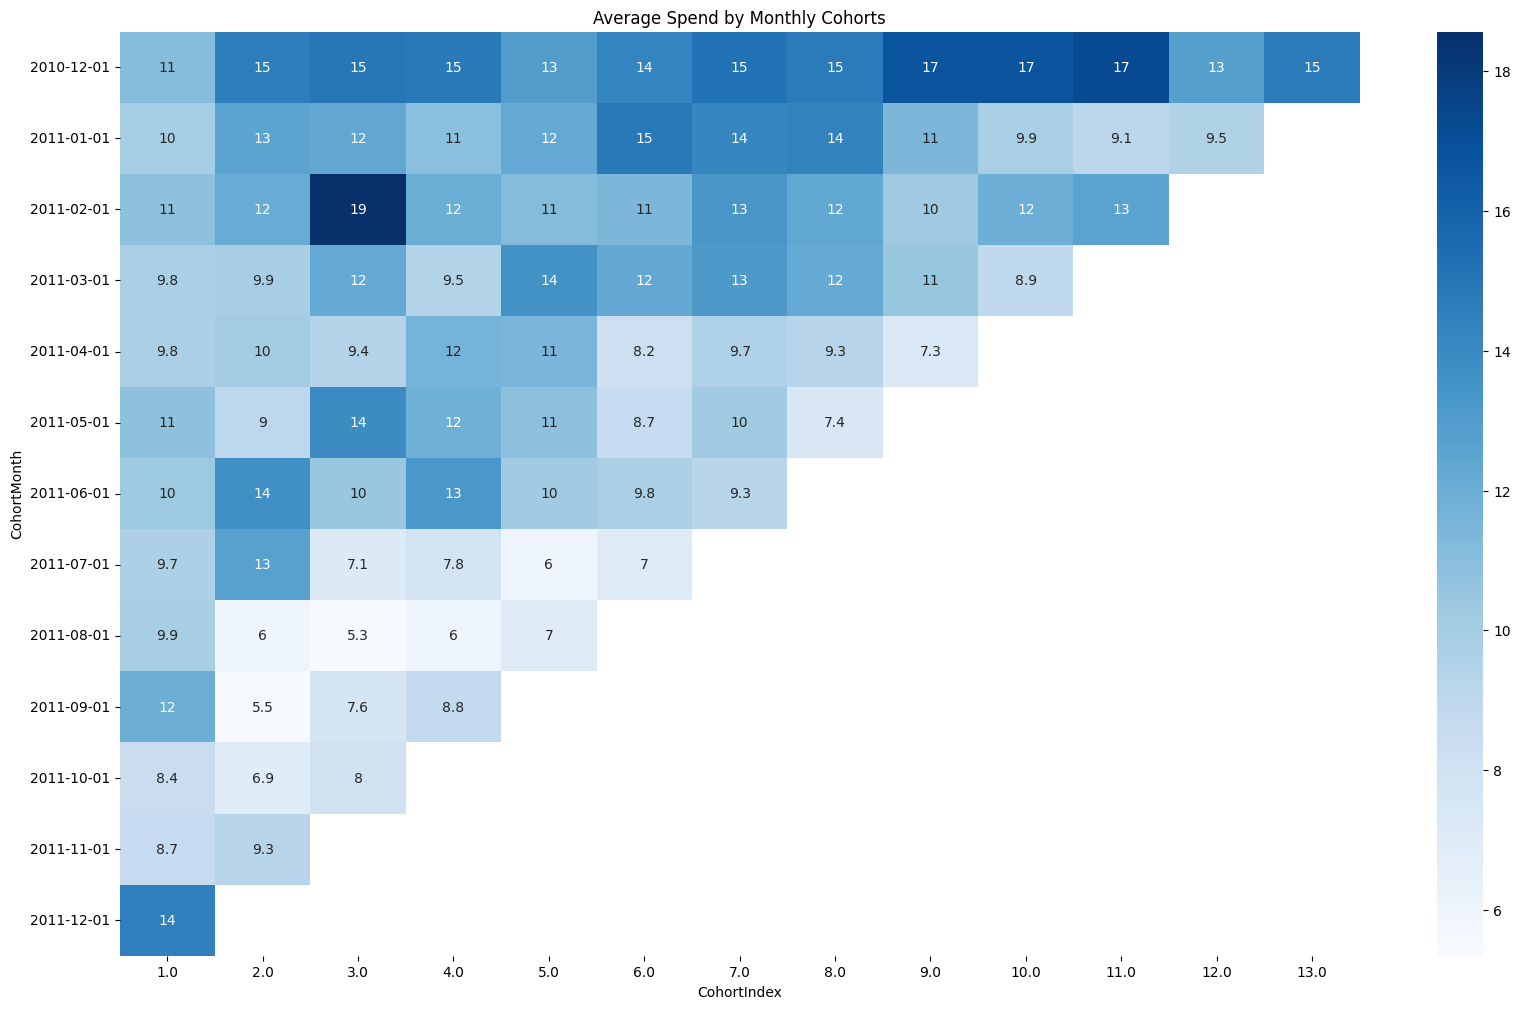

In [97]:
# Import seaborn package as sns
import seaborn as sns

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(20, 12))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(average_quantity, annot=True, cmap='Blues')
plt.show()